# Genetic Algorithm for Maximize a function 

Simple optimization example: Michaelewicz 99

Calculate the maximum of:  
$$f(x) = x * sin(10\pi*x) + 1, x \in [-1..2]$$

Solution: $f(x^#) = 2.85$, para $x^# = 1.85$

### Parametros
- Representação:
  - Binário, comprimento fixo
  - Precisão 6 casas decimais
  - Dividir o intervalo $-1$ a $2$ em $3*10^6$
  - São precisos 22 bits
  - $2^{21} < 3000000 <= 2^{22}$
 
- Seleção: Proporcional ao desempenho
  - Desempenho = $f(x)$
  
- Operadores genéticos
  - Crossover de um ponto (0.25)
  - Mutação simples (0.01)
  
- Critério de paragem: 
  - Numéro de gerações = 150

---

In [1]:
import numpy as np
import random
from math import sin, pi
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def initialize(size):
    """ Initialize population
    
    Args:
        size: Size of the population
        
    Returns:
        Numpy matrix with the population
    """
    
    population = np.zeros((size,23))
    
    for chrom in population:
        value      = random.randint(0, 4194303)
        binary     = list(f'{value:022b}')
        chrom[:-1] = [int(d) for d in binary]
        chrom[-1]  = fitness(chrom[:-1])
    
    return population    

In [3]:
def decode(chromosome):
    """ Convert binary to real in range (-1, 2) with 6 decimal precision
    
    Args:
        chromosome : 
    """
    
    b = ''.join(map(str, [str(int(d)) for d in chromosome]))
    x = int(b, 2)    
    v = np.array(-1.0 + (x * (3/4194303))).round(decimals=6)
    
    return(v)

In [4]:
def fitness(chromosome):
    """ Calculate fitness
    
    Args:
        chromosome: Chromosome to calculate fitness
        
    Returns:
        Calculated fitness
    """
    
    x      = decode(chromosome)
    fitness = x * sin(10 * pi * x) + 1
        
    return fitness

In [5]:
def selection(population, tx, k):
    """ Select chromosomes to reproduce using tournament algorithm
    
    Args:
        population : Matrix with all population
        tx         : 
        k          : Tournament size
        
    Return:
        Parents selected to reproduce
    """
    
    size = round(len(population) * tx)
    
    if (size % 2 != 0 or size == 0): 
        size += 1
        
    parents = np.zeros((size, population.shape[1]))
    
    for i in range(0, size):
        better_p = min(population[:,-1])
        for j in range(0, k):
            candidate = random.choice(population)
            if (candidate[-1] >= better_p):
                better_p = candidate[-1]
                select   = candidate

        parents[i] = select
    
    return parents

In [6]:
def crossover(parents):
    """ Create children using single-point crossover
    
    Args:
        parents: Matrix with selected parents
        
    Returns:
        Vector with generated children
    """
    
    children = parents.copy()
    
    for i in range(0, len(children), 2):
        point = int(np.array(random.sample(range(1, parents.shape[1] - 1), 1)))

        # Children 1
        children[i, :point]   = parents[i+1, :point]
        children[i,-1]         = fitness(children[i,:-1])
        
        # Children 2
        children[i+1, :point] = parents[i, :point]
        children[i+1, -1]      = fitness(children[i+1, :-1])
        
    return children

In [7]:
def mutation(population, tx):
    """ Apply mutation
    
    Args:
        population :
        tx         :
    """
    
    n_mutation = round(len(population)*tx)
    
    if (n_mutation < 0): 
        n_mutation = 1
        
    for i in range(0, n_mutation):
        chromosome = random.randint(2, population.shape[0] - 1)
        locus      = random.randint(0, population.shape[1] - 2)
        
        population[chromosome, locus] = random.randint(0,1)
        population[chromosome, -1]    = fitness(population[chromosome, :-1])
        

In [12]:
gen = 150
pop = initialize(1000)

better = np.zeros(gen)
mean   = np.zeros(gen)

for i in range(0, gen):
    pop          = pop[pop[:,-1].argsort()][::-1] # Sorte in decreasing order
    parents      = selection(pop, 0.4, 3)         # Population, tx, k   
    children     = crossover(parents)
    n_keep       = len(pop) - len(children)
    pop[n_keep:] = children
    mutation(pop, 0.1)
    
    better[i]    = pop[0, -1]
    mean[i]      = np.mean(pop[:,-1])
   

# pop = pop[pop[:,-1].argsort()][::-1]
# print(pop[:5])

In [13]:
x = decode(pop[1,:-1])
y = pop[1,-1]

print(f'Best: x:{x:.2f}, y:{y:.2f}')

Best: x:1.85, y:2.85


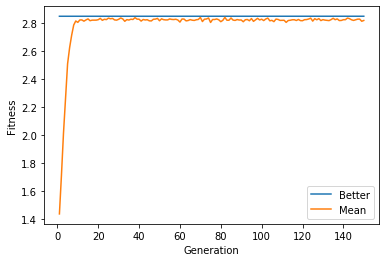

In [14]:
plt.figure()
plt.plot(np.arange(1,gen+1), better, label = 'Better')
plt.plot(np.arange(1,gen+1), mean, label = 'Mean')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()
plt.show()

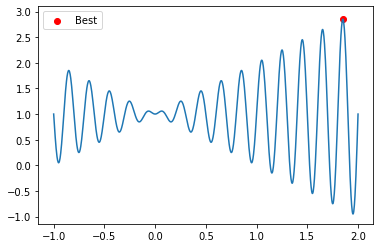

In [15]:
def f(x):
    return(x * sin(10 * pi * x) + 1)

x_axis = np.linspace(-1,2,len(pop))
y_axis = [f(i) for i in x_axis]

plt.figure()
plt.plot(x_axis, y_axis)
plt.scatter(x, y, c='r', label = 'Best')
plt.legend()
plt.show()